# Clayton Seabaugh: Midterm Project
**Author:** Clayton Seabaugh  
**Date:** 3-6-2025  
**Objective:** This project demonstrates my ability to apply classification modeling techniques to a real-world dataset. 

## Section 1: Import and Inspect the Data

### Section 1.1 Import modules and inspect first 10 rows

In [125]:
# Imports needed
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.stats import zscore
from ucimlrepo import fetch_ucirepo 

# sklearn modules
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 
  
# data (as pandas dataframes) 
X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 
  
# metadata 
print(banknote_authentication.metadata) 
  
# variable information 
print(banknote_authentication.variables) 


{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

In [126]:
# Create file path for data and print head
file_path = 'data\data_banknote_authentication.txt'
if os.path.exists(file_path):
    # Read and print df
    df = pd.read_csv(file_path)
    print(df.head(10))
else:
    print(f"File {file_path} does not exist.")


   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661  -2.80730 -0.44699      0
1   4.54590    8.1674  -2.45860 -1.46210      0
2   3.86600   -2.6383   1.92420  0.10645      0
3   3.45660    9.5228  -4.01120 -3.59440      0
4   0.32924   -4.4552   4.57180 -0.98880      0
5   4.36840    9.6718  -3.96060 -3.16250      0
6   3.59120    3.0129   0.72888  0.56421      0
7   2.09220   -6.8100   8.46360 -0.60216      0
8   3.20320    5.7588  -0.75345 -0.61251      0
9   1.53560    9.1772  -2.27180 -0.73535      0


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\clayt\AppData\Local\Temp\ipykernel_15124\722488926.py:2: SyntaxWarning: invalid escape sequence '\d'
  file_path = 'data\data_banknote_authentication.txt'


### Section 1.2 Check for missing values and display summary statitistics

In [127]:
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing Values in each Column:\n{missing_values}")

# Generate summary statistics
summary_stats = df.describe()
print (f"Summary Statistics:\n{summary_stats}")

Missing Values in each Column:
variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64
Summary Statistics:
          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


### Reflection 1:
- What do you notice about the dataset? Are there any data issues? I notice that there are no null values and that the dataset is primarily float numbers except class which are integers. I can see it is a rather large dataset with 1372 rows. 

## Section 2: Data Exploration and Preparation

### Section 2.1 Explore data patterns and distributions

<function matplotlib.pyplot.show(close=None, block=None)>

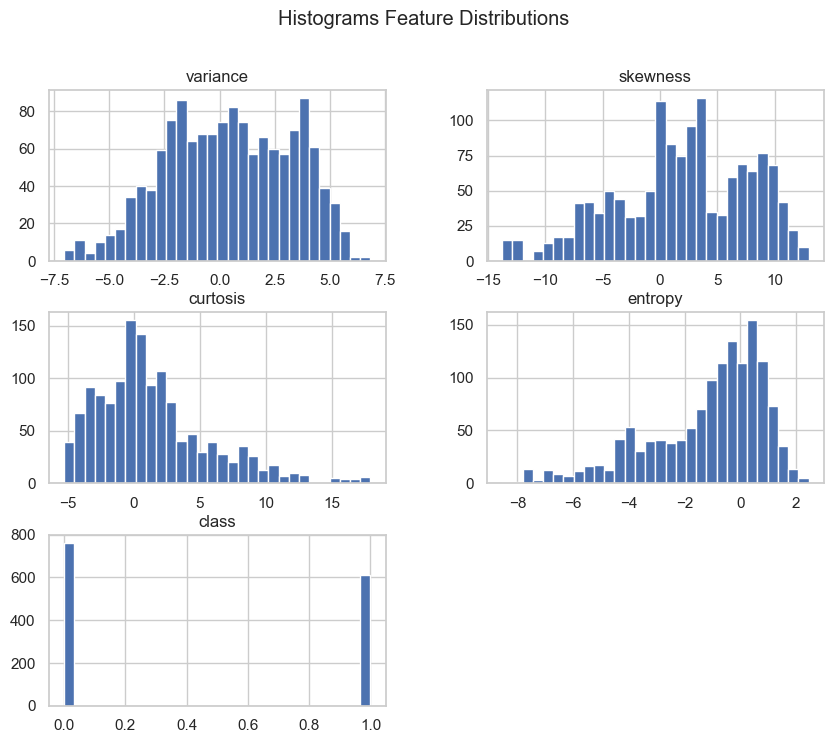

In [128]:
# Create a Histo visualization feature distributions
df.hist(bins=30, figsize=(10, 8))
plt.suptitle('Histograms Feature Distributions')
plt.show

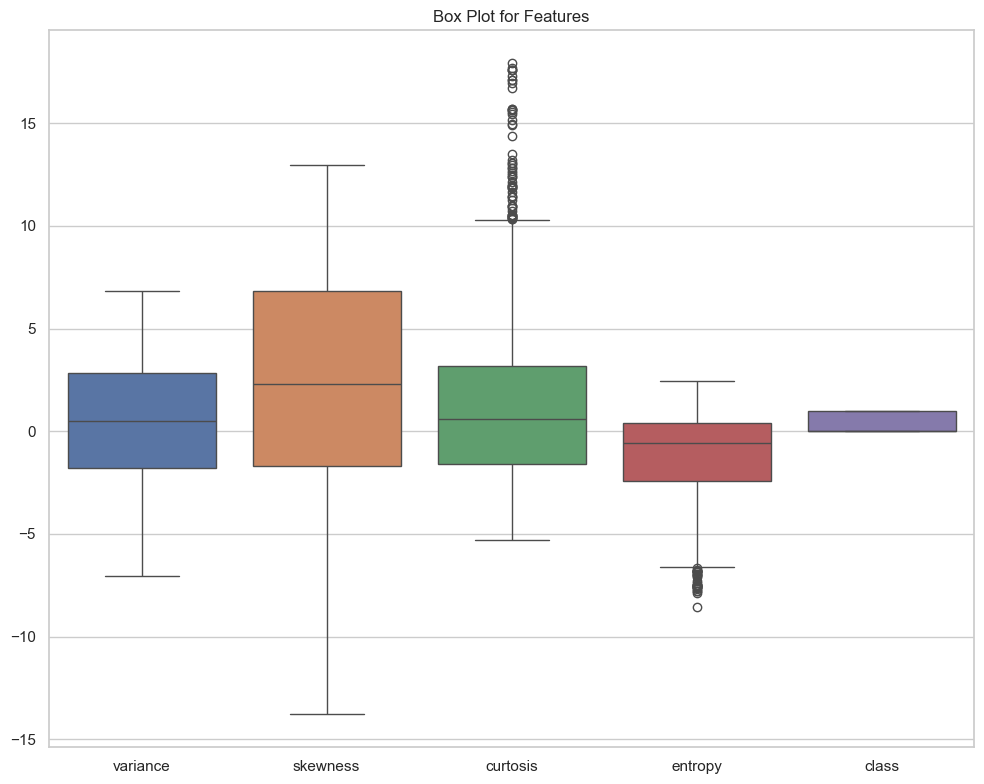

In [129]:
# Create a box plot to show outliers
plt.figure(figsize=(10,8))
sns.boxplot(df)
plt.title("Box Plot for Features")
plt.tight_layout()
plt.show()


In [130]:
# Check for skewness and outliers using Z-scores
z_scores = zscore(df)
outliers = (abs(z_scores) > 3).any(axis=1)

# Display outliers
outlier_rows = df[outliers]
print(f"Number of Outliers: {len(outlier_rows)}")
print(outlier_rows)

Number of Outliers: 36
      variance  skewness   curtosis  entropy  class
45    -0.78690    9.5663  -3.786700 -7.50340      0
47    -0.78690    9.5663  -3.786700 -7.50340      0
194   -2.34100   12.3784   0.704030 -7.58360      0
202   -0.78689    9.5663  -3.786700 -7.50340      0
291   -2.21530   11.9625   0.078538 -7.78530      0
394   -2.26230   12.1177   0.288460 -7.75810      0
465   -2.69890   12.1984   0.676610 -8.54820      0
529   -1.38850   12.5026   0.691180 -7.54870      0
562   -2.46040   12.7302   0.917380 -7.64180      0
581   -1.96670   11.8052  -0.404720 -7.87190      0
740   -2.44730   12.6247   0.735730 -7.66120      0
765   -3.84830  -12.8047  15.682400 -1.28100      1
820   -4.00250  -13.4979  17.677200 -3.32020      1
826   -4.21100  -12.4736  14.970400 -1.38840      1
881   -4.48610  -13.2889  17.308700 -3.21940      1
887   -3.26920  -12.7406  15.557300 -0.14182      1
942   -3.37930  -13.7731  17.927400 -2.03230      1
948   -3.49170  -12.1736  14.368900 -0.61

### Section 2.2 Handle missing values and clean data

There are no missing values, no categorical data and only 36 outliers out of the 1372 rows of data. I think it would be beneficial to keep those outliers so it will not skew any results.

### Section 2.3 Features selection and engineering

In [131]:
# Create new features

# New Feature 1: A feature that is an interaction between variance and skewness
df['var_skew_interaction'] = df['variance'] * df['skewness']


In [132]:
# Scale and normalize data

# Standardization (Z-score scaling)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[['variance', 'skewness', 'curtosis', 'entropy']] = scaler.fit_transform(df_scaled[['variance', 'skewness', 'curtosis', 'entropy']])

# Normalization (Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[['variance', 'skewness', 'curtosis', 'entropy']] = min_max_scaler.fit_transform(df_normalized[['variance', 'skewness', 'curtosis', 'entropy']])

print(df.head())

   variance  skewness  curtosis  entropy  class  var_skew_interaction
0   3.62160    8.6661   -2.8073 -0.44699      0             31.385148
1   4.54590    8.1674   -2.4586 -1.46210      0             37.128184
2   3.86600   -2.6383    1.9242  0.10645      0            -10.199668
3   3.45660    9.5228   -4.0112 -3.59440      0             32.916510
4   0.32924   -4.4552    4.5718 -0.98880      0             -1.466830


### Reflection 2
- What pattern onomolies od you see? I did not see really many anomolies. I found around 36 total outliers. Hopefully graphing these regression will showcase more and give me better insights. 
- Do any features stand out? Variance and skewness I am very curious about var_skew_interaction since I am curious on how those two interplay with each other.
- What preprocessing steps were necessary to clean and improve the data? The data was actually very clean. I did not have to do much to it. I changed a few things and created some new features so I could gather more insights. 
- Did you create or modify any features to improve performance? Yes I created a polynomial of skewness and a variance/skew interaction feature.

## Section 3: Feature Selection and Justification

### Section 3.1 Choose Features and Target

##### The target variable(y)will be class. It is a categorical variable that indicates whether a banknote is genuine(0) or fake (1)

##### The selected features(X):
- variance: wavelet image variance
- skewness: skewness of the image wavelet distribution
- var_skew_interaction: capture the relationship between var and skew (Non-linear)
- skewness^2: for models that are not inherently non-linear

In [133]:
# Define Case 1: variance 
X1 = df[['variance']]
y1 = df['class']

# Define Case 2: skewness
X2 = df[['skewness']]
y2 = df['class']

X3 = df[['var_skew_interaction']]
y3 = df['class']


### Reflection 3
- Why did you choose these features? I chose these features because I figured they would be great at finding any patterns and training the models. I also created features to add some complexity incase we find any non-linear patterns. 
- How might they impact predictions or accuracy? With different features we can adjust and combine them to find the best outcome of creating a model that can find indicators of Forged vs real banknotes.

## Section 4 Train a Model (Logistic Regression)

### 4.1/4.2 Split the data and train the model

In [134]:
# Create function to evaluate each case
def evaluate_feature_logr(X, y, case_name="Feature Case"):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Train the log regression model
    logr_model = LogisticRegression()
    logr_model.fit(X_train, y_train)

    # Predictions
    y_pred = logr_model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display Classification performance
    print(f"\n {case_name}")
    print("-----------------")
    print("Accuracy :", accuracy)
    print("Precision :", precision)
    print("Recall :", recall)
    print("F1 Score :", f1)
    print("Confusion Matrix:\n", conf_matrix)

### 4.3 Evaluate performance


 Case 1: Variance
-----------------
Accuracy : 0.8618181818181818
Precision : 0.8387096774193549
Recall : 0.8524590163934426
F1 Score : 0.8455284552845529
Confusion Matrix:
 [[133  20]
 [ 18 104]]

 Case 2: Skewness
-----------------
Accuracy : 0.6690909090909091
Precision : 0.6565656565656566
Recall : 0.5327868852459017
F1 Score : 0.5882352941176471
Confusion Matrix:
 [[119  34]
 [ 57  65]]

 Case 3: Var * Skew Interaction
-----------------
Accuracy : 0.5563636363636364
Precision : 0.5
Recall : 0.13114754098360656
F1 Score : 0.2077922077922078
Confusion Matrix:
 [[137  16]
 [106  16]]


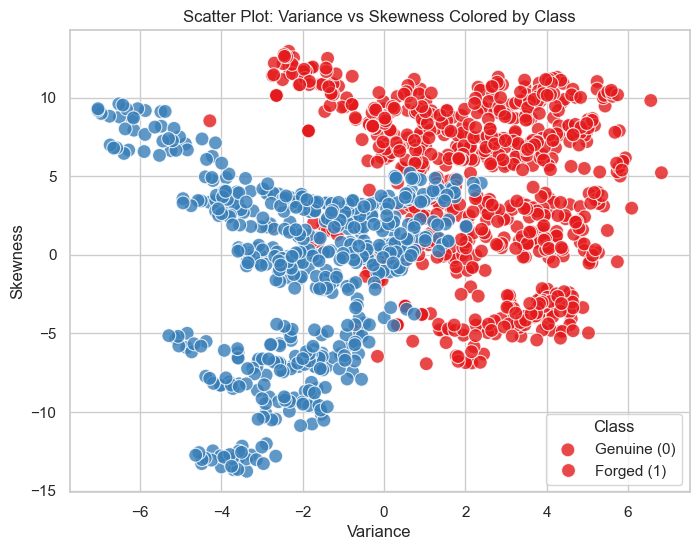

In [135]:
# Case 1: variance
evaluate_feature_logr(X1, y1, case_name="Case 1: Variance")

# Case 2: skewness
evaluate_feature_logr(X2, y2, case_name="Case 2: Skewness")

# Case 3: var_skew_interaction
evaluate_feature_logr(X3, y3, case_name="Case 3: Var * Skew Interaction")

# Set the figure size and style
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Variance vs Skewness Plot
sns.scatterplot(
    data=df,
    x='variance',
    y='skewness',
    hue='class',
    palette='Set1',
    alpha=0.8,
    s=100
)

plt.title("Scatter Plot: Variance vs Skewness Colored by Class")
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.legend(title="Class", labels=["Genuine (0)", "Forged (1)"])
plt.show()

In [136]:
# Combine all features to see evaluation
X_combo = df[['variance', 'skewness', 'var_skew_interaction']]
y_combo = df['class']

evaluate_feature_logr(X_combo, y_combo, case_name="Combo: Variance + Skewness + Interaction")




 Combo: Variance + Skewness + Interaction
-----------------
Accuracy : 0.9054545454545454
Precision : 0.8870967741935484
Recall : 0.9016393442622951
F1 Score : 0.8943089430894309
Confusion Matrix:
 [[139  14]
 [ 12 110]]


### Reflection 4
- How well did the model perform? The model performed very well. It was interesting to see which of the features were the best predictor. Variance was the best individual; however, a combination of all three yielded great results. 
- Any surprises in the results? I was surprised in how well the model performed with the combination of all three of the features. 

## Section 5: Try an Alternative Model (Decision Tree)

### 5.1 Train an Alternative Classifier

In [137]:
# Create function to evaluate each case
def evaluate_feature_dectree(X, y, case_name="Feature Case"):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Train the tree model
    dectree_model = DecisionTreeClassifier(random_state=42)
    dectree_model.fit(X_train, y_train)

    # Predictions
    y_pred = dectree_model.predict(X_test)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display Classification performance
    print(f"\n {case_name}")
    print("-----------------")
    print("Accuracy :", accuracy)
    print("Precision :", precision)
    print("Recall :", recall)
    print("F1 Score :", f1)
    print("Confusion Matrix:\n", conf_matrix)

### 5.2 Compare performance of all cases and models

In [138]:
# Compare Case 1: variance
evaluate_feature_dectree(X1, y1, case_name="Case 1: Variance")
evaluate_feature_logr(X1, y1, case_name="Case 1: Variance")

# Compare Case 2: skewness
evaluate_feature_dectree(X2, y2, case_name="Case 2: Skewness")
evaluate_feature_logr(X2, y2, case_name="Case 2: Skewness")

# Compare Case 3: var_skew_interaction
evaluate_feature_dectree(X3, y3, case_name="Case 3: Var * Skew Interaction")
evaluate_feature_logr(X3, y3, case_name="Case 3: Var * Skew Interaction")

# Compare Case 4: Combonation
evaluate_feature_dectree(X_combo, y_combo, case_name="Combo: Variance + Skewness + Interaction")
evaluate_feature_logr(X_combo, y_combo, case_name="Combo: Variance + Skewness + Interaction")


 Case 1: Variance
-----------------
Accuracy : 0.8109090909090909
Precision : 0.7777777777777778
Recall : 0.8032786885245902
F1 Score : 0.7903225806451613
Confusion Matrix:
 [[125  28]
 [ 24  98]]

 Case 1: Variance
-----------------
Accuracy : 0.8618181818181818
Precision : 0.8387096774193549
Recall : 0.8524590163934426
F1 Score : 0.8455284552845529
Confusion Matrix:
 [[133  20]
 [ 18 104]]

 Case 2: Skewness
-----------------
Accuracy : 0.7127272727272728
Precision : 0.6837606837606838
Recall : 0.6557377049180327
F1 Score : 0.6694560669456067
Confusion Matrix:
 [[116  37]
 [ 42  80]]

 Case 2: Skewness
-----------------
Accuracy : 0.6690909090909091
Precision : 0.6565656565656566
Recall : 0.5327868852459017
F1 Score : 0.5882352941176471
Confusion Matrix:
 [[119  34]
 [ 57  65]]

 Case 3: Var * Skew Interaction
-----------------
Accuracy : 0.6
Precision : 0.5566037735849056
Recall : 0.48360655737704916
F1 Score : 0.5175438596491229
Confusion Matrix:
 [[106  47]
 [ 63  59]]

 Case 3: 

### Reflection 5 
- Which model performed better? It depends on what the goals are. Both models performed VERY similarly. The logistic regression model tended to perform better with variance and has higher precision with the combonation case. The decision tree performed better with Skewness and Var * Skew Interaction and excelled with recall for the combonation case. Based off of this, Logistic Regression should be used in cases where precision is more important and the Decision Tree should be used when recall or identifying true positives is more important. 
- Why might one classifier be more effective in this specific case? With the goal of finding out which ones were the "fakes" it would be better to have the Linear Regression model because it has fewer false positives. We want a higher precision so we can find the correct banknotes and that fake banknotes do not go through. 

## Section 6: Final Thoughts and Insights

### 6.1 Summarize Findings
Throughout this project, we evaluated various machine learning models (Decision Tree and Logistic Regression) using different feature sets to predict banknote authenticity (binary classification). The results reveal the following key insights:

- Logistic Regression tends to perform better in terms of precision across most cases, with higher F1 scores in some cases like Variance and Combo.

- Decision Tree outperforms Logistic Regression in recall, especially when it comes to skewness and Var * Skew Interaction. This shows that the Decision Tree is better at identifying true positives, which is crucial for some applications where recall is prioritized over precision.

T- he Combo case, which combines multiple features, shows that both models perform well, achieving an accuracy of around 90%. However, Logistic Regression had a slightly higher precision, while Decision Tree had a higher recall.

- Features like skewness and the interaction between variance and skewness seemed to make it harder for the models to distinguish the classes, as evidenced by lower performance metrics in those cases.

Overall, combining multiple features, as in the Combo case, led to the best results for both models.

### 6.2 Discuss Challenges Faced

- Feature Engineering:

    - Selecting the right features for classification was challenging, as not all features contributed equally to the models' performance. For instance, the Var * Skew Interaction led to poor performance, which suggests that interaction terms might need further exploration to understand their impact.

- Class Imbalance:

    - While we used stratified sampling in the train_test_split to handle class imbalance, there may still be some effect of this imbalance that could be better managed with other techniques like oversampling/undersampling or using different evaluation metrics (e.g., ROC-AUC).

- Model Overfitting:

    - The Decision Tree model showed signs of overfitting in some cases, especially with fewer features. This is a common issue, and techniques such as pruning, setting a maximum depth, or using ensemble methods (e.g., Random Forests) could mitigate this.

- Evaluation Metrics:

    - It was essential to consider multiple metrics (Accuracy, Precision, Recall, F1 Score) for evaluating the models, as a single metric might not fully capture model performance, especially when the classes are imbalanced.

### 6.3 Future Additions

- Hyperparameter Tuning:
    - Using grid search or random search to fine-tune the hyperparameters of both models could improve their performance. For example, tuning the depth of the Decision Tree or regularization parameters in Logistic Regression could help achieve a better balance between precision and recall.

- Ensemble Methods:

    - Exploring ensemble methods like Random Forests or Gradient Boosting could provide better performance by reducing overfitting and improving generalization.

- Advanced Feature Engineering:

    - Investigating other potential features or transformations (log, square, or interactions of features) could improve model accuracy. I’d also consider testing domain-specific transformations to enhance the signal in the data.

- Address Class Imbalance:

    - Experimenting with oversampling or undersampling techniques (e.g., SMOTE) to handle class imbalance might further improve model performance, particularly for recall.

- Deep Learning Models:

    - Trying Neural Networks or other deep learning techniques for this classification problem could be a valuable experiment, given the rich nature of the data extracted from images.

### Reflection 6
- What did I learn from this project? 
    - I learned how to create and implement models from the ground up. 
    - I learned how to create functions that implemented these models that could apply to data. 
    - I learned The importance with choosing the best features in model performance (Var * Skew did not do well by itself but in combonation with the other features it performed well)
    - The balance of precision and recall
    - The importance of testing multiple models evaluating their different strengths